In [306]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime
import pymysql

#Datos de conexión
usuario='EquipoB'
contraseña="E1q2u3i4p5oB"
host='212.227.90.6'
puerto=3306
nombre_base_datos='EquipB'

#URL de la conexión
url_conexion=f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

#Crear l'engine de SQLAlchemy
try:
    engine=create_engine(url_conexion)
    cnx=engine.connect()
    print("Conexión correcta")
except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")
    
#Obtener el nombre de les tablas
inspector=inspect(engine)
nombre_tablas=inspector.get_table_names()

# Diccionario para almacenar los DataFrames
df= {}

for tabla in nombre_tablas:
    query=f"SELECT * FROM {tabla}"
    
    try:
        df[tabla] = pd.read_sql(query, cnx)
        print(f"Tabla '{tabla}' cargada correctamente.")
    except Exception as e:
        print(f"Error al cargar la tabla '{tabla}':{e}")
  
# Cerrrar la conexión
cnx.close()

Conexión correcta
Tabla 'BANK_marketing' cargada correctamente.
Tabla 'BANK_marketing131024' cargada correctamente.
Tabla 'BANK_marketing211024' cargada correctamente.
Tabla 'BANK_marketing_backup_211024' cargada correctamente.


In [307]:
plt.style.use("seaborn-v0_8-deep")

In [308]:
df_bank = df['BANK_marketing211024']

df_finanzas = df_bank[['id','age','job','marital','education','default','balance','housing','loan','deposit']]

In [309]:
df_finanzas.head()

,id,age,job,marital,education,default,balance,housing,loan,deposit
0,1,59,admin.,married,secondary,0,2343,1,0,1
1,2,59,admin.,married,secondary,0,2343,1,0,1
2,3,56,admin.,married,secondary,0,45,0,0,1
3,4,41,technician,married,secondary,0,1270,1,0,1
4,5,55,services,married,secondary,0,2476,1,0,1


In [310]:
df_finanzas.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
deposit      0
dtype: int64

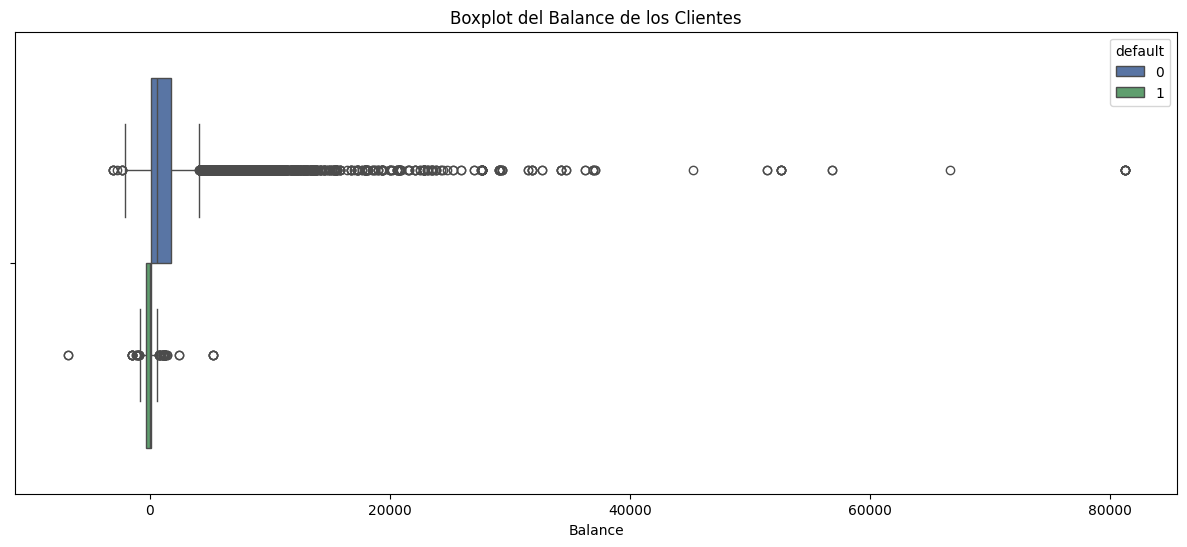

In [311]:
plt.figure(figsize=(15, 6))

sns.boxplot(data=df_finanzas, x = "balance", hue="default")

plt.title("Boxplot del Balance de los Clientes")
plt.xlabel("Balance")

plt.show()

In [312]:
df_finanzas.describe()

,id,age,default,balance,housing,loan,deposit
count,26163.000000,26163.000000,26163.000000,26163.000000,26163.000000,26163.000000,26163.00000
mean,13166.088216,41.278905,0.014830,1522.062607,0.472882,0.132668,0.47357
std,7642.948371,11.965048,0.120875,3254.107270,0.499274,0.339222,0.49931
min,1.000000,18.000000,0.000000,-6847.000000,0.000000,0.000000,0.00000
25%,6541.500000,32.000000,0.000000,123.000000,0.000000,0.000000,0.00000
50%,13082.000000,39.000000,0.000000,543.000000,0.000000,0.000000,0.00000
75%,19842.500000,49.000000,0.000000,1704.000000,1.000000,0.000000,1.00000
max,26383.000000,95.000000,1.000000,81204.000000,1.000000,1.000000,1.00000


In [313]:
# Definir el rango de agrupación (cada 100)
bins = range(-1700, 600, 100)  #limito el rango

# Crear una nueva columna que contenga los rangos
df_finanzas['rango'] = pd.cut(df_finanzas['balance'], bins)

C:\Users\Natalya\AppData\Local\Temp\ipykernel_19996\4247683204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finanzas['rango'] = pd.cut(df_finanzas['balance'], bins)


In [349]:
resultado = df_finanzas.groupby("rango")['default'].mean() * 100
resultado = resultado.reset_index(name="porcentaje morosidad (%)")
resultado = resultado.sort_index(ascending=False)
resultado

C:\Users\Natalya\AppData\Local\Temp\ipykernel_19996\974860267.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultado = df_finanzas.groupby("rango")['default'].mean() * 100


,rango,porcentaje morosidad (%)
21,"(400, 500]",0.580431
20,"(300, 400]",0.639795
19,"(200, 300]",1.251422
18,"(100, 200]",0.784698
17,"(0, 100]",2.696544
16,"(-100, 0]",4.276169
15,"(-200, -100]",4.330709
14,"(-300, -200]",8.189655
13,"(-400, -300]",14.285714
12,"(-500, -400]",13.235294


In [350]:
# Crear una nueva columna que calcule la diferencia porcentual con respecto al rango anterior
resultado['diferencia (%)'] = resultado['porcentaje morosidad (%)'].pct_change() * 100

# Llenar el primer valor de la diferencia con NaN (porque no hay rango anterior)
resultado['diferencia (%)'].fillna(0, inplace=True)

# Mostrar el dataframe con la nueva columna
resultado.reset_index()
resultado

C:\Users\Natalya\AppData\Local\Temp\ipykernel_19996\1066041955.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  resultado['diferencia (%)'].fillna(0, inplace=True)


,rango,porcentaje morosidad (%),diferencia (%)
21,"(400, 500]",0.580431,0.000000
20,"(300, 400]",0.639795,10.227584
19,"(200, 300]",1.251422,95.597270
18,"(100, 200]",0.784698,-37.295466
17,"(0, 100]",2.696544,243.640809
16,"(-100, 0]",4.276169,58.579629
15,"(-200, -100]",4.330709,1.275427
14,"(-300, -200]",8.189655,89.106583
13,"(-400, -300]",14.285714,74.436090
12,"(-500, -400]",13.235294,-7.352941


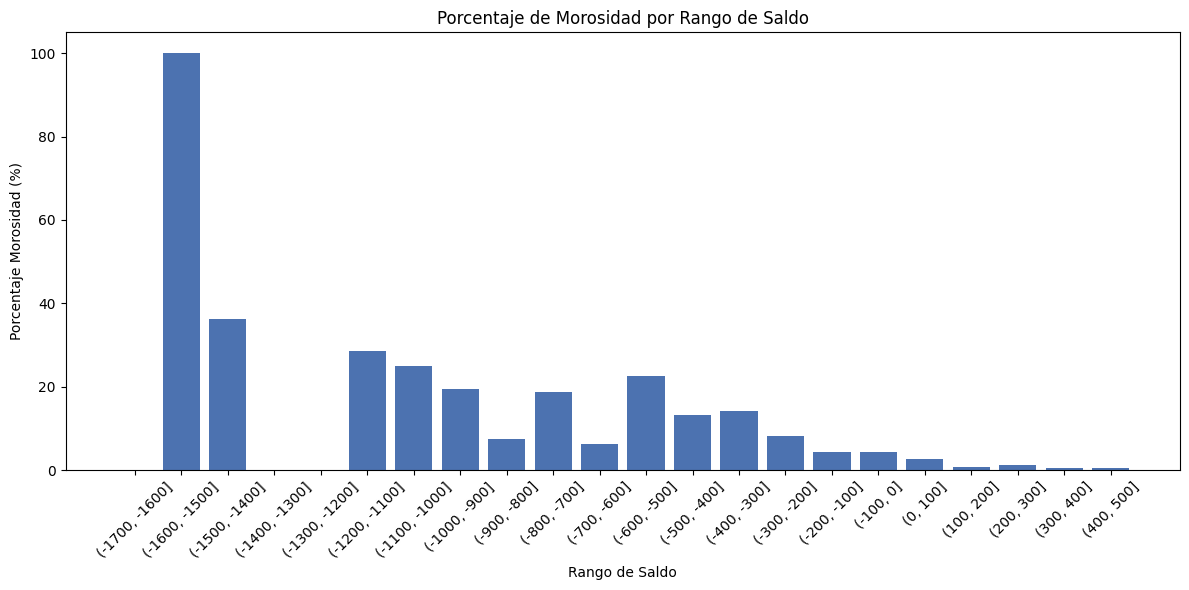

In [315]:
# Creamos el gráfico de barras
plt.figure(figsize=(12,6))
plt.bar(resultado['rango'].astype(str), resultado['porcentaje morosidad (%)'])

# Añadir título y etiquetas
plt.title('Porcentaje de Morosidad por Rango de Saldo')
plt.xlabel('Rango de Saldo')
plt.ylabel('Porcentaje Morosidad (%)')

# Rotar etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [316]:
df_finanzas.groupby("rango").size().reset_index(name="cantidad clientes")

C:\Users\Natalya\AppData\Local\Temp\ipykernel_19996\1191905393.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_finanzas.groupby("rango").size().reset_index(name="cantidad clientes")


,rango,cantidad clientes
0,"(-1700, -1600]",2
1,"(-1600, -1500]",2
2,"(-1500, -1400]",11
3,"(-1400, -1300]",1
4,"(-1300, -1200]",2
5,"(-1200, -1100]",7
6,"(-1100, -1000]",4
7,"(-1000, -900]",31
8,"(-900, -800]",27
9,"(-800, -700]",53


Hay muy pocos clientes que tienen saldo inferior a -1000.

## Random Forest

### Tratamiento de outliers 
A partir de aquí, utilizamos el df sin outliers para seguir realizando nuestro análisis

In [317]:
Q1 = df_finanzas['balance'].quantile(0.25)
Q3 = df_finanzas['balance'].quantile(0.75)
IQR = Q3 - Q1

limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR

df_f_sinoutliers = df_finanzas[(df_finanzas['balance'] >= limite_inf) & (df_finanzas['balance'] <= limite_sup)]

df_f_sinoutliers.head() 

,id,age,job,marital,education,default,balance,housing,loan,deposit,rango
0,1,59,admin.,married,secondary,0,2343,1,0,1,NaN
1,2,59,admin.,married,secondary,0,2343,1,0,1,NaN
2,3,56,admin.,married,secondary,0,45,0,0,1,"(0.0, 100.0]"
3,4,41,technician,married,secondary,0,1270,1,0,1,NaN
4,5,55,services,married,secondary,0,2476,1,0,1,NaN


In [318]:
df_f_sinoutliers.describe()

,id,age,default,balance,housing,loan,deposit
count,23686.000000,23686.000000,23686.000000,23686.000000,23686.000000,23686.000000,23686.000000
mean,13186.613105,40.936671,0.016128,806.669636,0.480326,0.139703,0.463607
std,7625.134696,11.778813,0.125969,992.792950,0.499623,0.346686,0.498684
min,1.000000,18.000000,0.000000,-2049.000000,0.000000,0.000000,0.000000
25%,6620.250000,32.000000,0.000000,96.000000,0.000000,0.000000,0.000000
50%,13068.500000,38.000000,0.000000,440.000000,0.000000,0.000000,0.000000
75%,19845.750000,48.000000,0.000000,1222.000000,1.000000,0.000000,1.000000
max,26383.000000,95.000000,1.000000,4071.000000,1.000000,1.000000,1.000000


### Creación del modelo

Modelo con el dataframe completo

In [319]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report

# # Definir la variable explicativa (X) y la variable objetivo (y)
# X = df_finanzas[['balance']]  # Variable explicativa
# y = df_finanzas['default']    # Variable objetivo

# # Dividir los datos en conjuntos de entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Crear el modelo de Random Forest
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# # Entrenar el modelo con los datos filtrados
# rf_model.fit(X_train, y_train)

# # Hacer predicciones (opcional)
# y_pred = rf_model.predict(X_test)

# # Evaluar el modelo (opcional)
# print(classification_report(y_test, y_pred))

Modelo sin outliers

In [320]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Definir la variable explicativa (X) y la variable objetivo (y)
X = df_f_sinoutliers[['balance']]  # Variable explicativa
y = df_f_sinoutliers['default']    # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos filtrados
rf_model.fit(X_train, y_train)

# Hacer predicciones (opcional)
y_pred = rf_model.predict(X_test)

# Evaluar el modelo (opcional)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6994
           1       0.68      0.21      0.32       112

    accuracy                           0.99      7106
   macro avg       0.83      0.60      0.65      7106
weighted avg       0.98      0.99      0.98      7106



Ejemplo de interpretación:

1. Precision (Precisión):
* Clase 0 (no moroso): 0.99 → El modelo es muy preciso en predecir correctamente cuando un cliente no incumple. Esto significa que de todos los clientes predichos como clase 0, el 99% efectivamente no incumplió.
* Clase 1 (moroso): 0.74 → El modelo tiene una precisión razonable para la clase de incumplimiento. El 74% de los clientes predichos como incumplidores realmente incumplen, pero esto no significa que los identifique bien en general.

2. Recall (Sensibilidad o Tasa de Verdaderos Positivos):
* Clase 0 (no moroso): 1.00 → El modelo es prácticamente perfecto en identificar los casos de no incumplimiento. Esto indica que el modelo casi no comete errores al clasificar clientes que no incumplen.
* Clase 1 (moroso): 0.25 → Aquí es donde el modelo muestra una debilidad considerable. Solo identifica el 25% de los clientes que efectivamente incumplen. Este bajo recall indica que el modelo está perdiendo muchas instancias de incumplimiento, lo que es una gran limitación para la clase minoritaria.

3. F1-Score:
* Clase 0 (no moroso): 0.99 → El equilibrio entre precisión y recall para la clase 0 es excelente, dado el alto valor en ambas métricas.
* Clase 1 (moroso): 0.38 → El F1-score para la clase 1 es bajo, lo que indica un balance deficiente entre la precisión y el recall para los incumplidores. Esto resalta las dificultades del modelo para manejar correctamente la clase de incumplimiento.

4. Support:
* Clase 0 (no moroso): 6996
* Clase 1 (moroso): 110

Aquí vemos un claro desequilibrio en las clases: hay muchos más clientes no morosos (6996) en comparación con los morosos (110). Este desbalance de clases puede afectar negativamente al modelo, ya que tiende a enfocarse más en predecir la clase mayoritaria (no morosos).

5. Accuracy (Exactitud): 0.99 → A primera vista, parece que el modelo es casi perfecto, pero esta métrica no es muy representativa en este caso. Dado que la clase 0 es muy dominante (6996 instancias vs 110 de la clase 1), un modelo que simplemente predijera siempre clase 0 tendría una alta exactitud.

Problemas:
* Desbalance de clases: La clase 1 (incumplimiento) tiene muy pocos ejemplos en comparación con la clase 0, lo que lleva a un mal rendimiento en la detección de incumplimientos (bajo recall y F1-score). El modelo está muy sesgado hacia la clase 0.
* Recall bajo en la clase minoritaria: Dado el bajo recall para la clase 1, el modelo está fallando en capturar a la mayoría de los incumplidores, lo que podría ser problemático si la predicción de incumplimiento es crucial para el objetivo del modelo.

Conclusiones:
* Desempeño en la clase 0 (no moroso): El modelo es excelente para identificar a los clientes no morosos, con un recall perfecto (1.00) y una precisión casi perfecta (0.99).
* Desempeño en la clase 1 (moroso): El modelo no está capturando bien a los clientes morosos, con un recall muy bajo (0.25). Esto significa que muchos clientes que en realidad son morosos están siendo clasificados incorrectamente como no morosos.

### Probabilidades de incumplimiento

Cálculo de probabilidades de incumplimiento:

In [334]:
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

results = pd.DataFrame({'saldo': X_test['balance'], 'probabilidad_incumplimiento': y_prob})

In [322]:
results.head()

,saldo,probabilidad_incumplimiento
23537,137,0.0
10681,30,0.0
20695,2570,0.0
6907,2240,0.0
23645,333,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


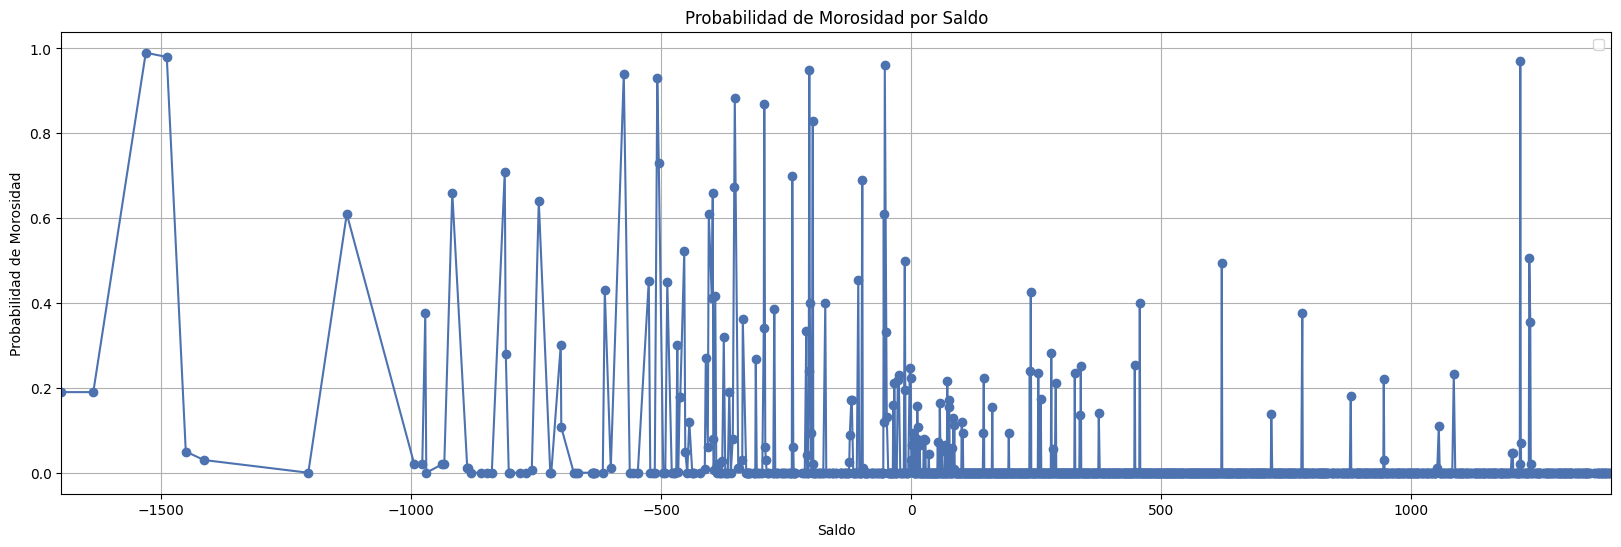

In [335]:
# Agrupar por saldo y calcular la probabilidad media de incumplimiento
saldo_probabilidad = results.groupby('saldo').mean().reset_index()

# saldo_filtrado = saldo_probabilidad[saldo_probabilidad['saldo'] < 2250].copy()

plt.figure(figsize=(20, 6))
plt.plot(saldo_probabilidad['saldo'], saldo_probabilidad['probabilidad_incumplimiento'], marker='o')
plt.xlabel('Saldo')
plt.ylabel('Probabilidad de Morosidad')
plt.title('Probabilidad de Morosidad por Saldo')


plt.xlim(-1700, 1400)
plt.grid()
plt.legend()
plt.show()

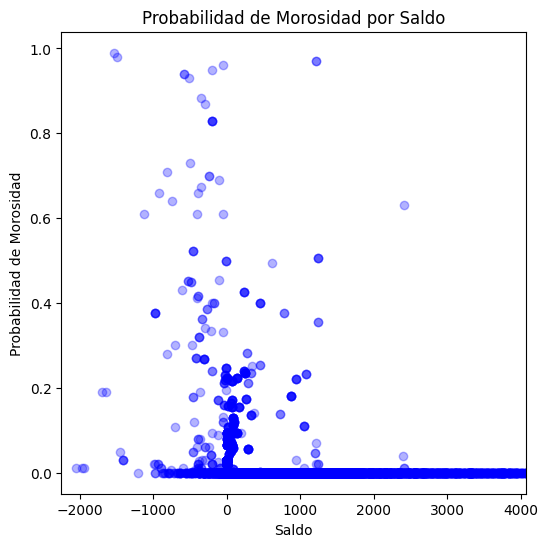

In [332]:
# Gráfico de dispersión para mostrar la relación entre saldo y probabilidad de incumplimiento
plt.figure(figsize=(6, 6))
plt.scatter(results['saldo'], results['probabilidad_incumplimiento'], alpha=0.3, color='b')
plt.title('Probabilidad de Morosidad por Saldo')
plt.xlabel('Saldo')
plt.xlim(-2250, 4075)
plt.ylabel('Probabilidad de Morosidad')
plt.show()

Se observan las probabilidades de incumplimiento para saldos individuales, no estan agrupados por rangos. 

Al no estar agrupados, dificulta ver el comportamiento general. Lo que sí vemos es que entorno y por debajo de 0€, hay mas puntos representativos de probabilidades y de magnitud más elevada. 

C:\Users\Natalya\AppData\Local\Temp\ipykernel_19996\3507656241.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultado_prob = results.groupby('rango')['probabilidad_incumplimiento'].mean().reset_index()


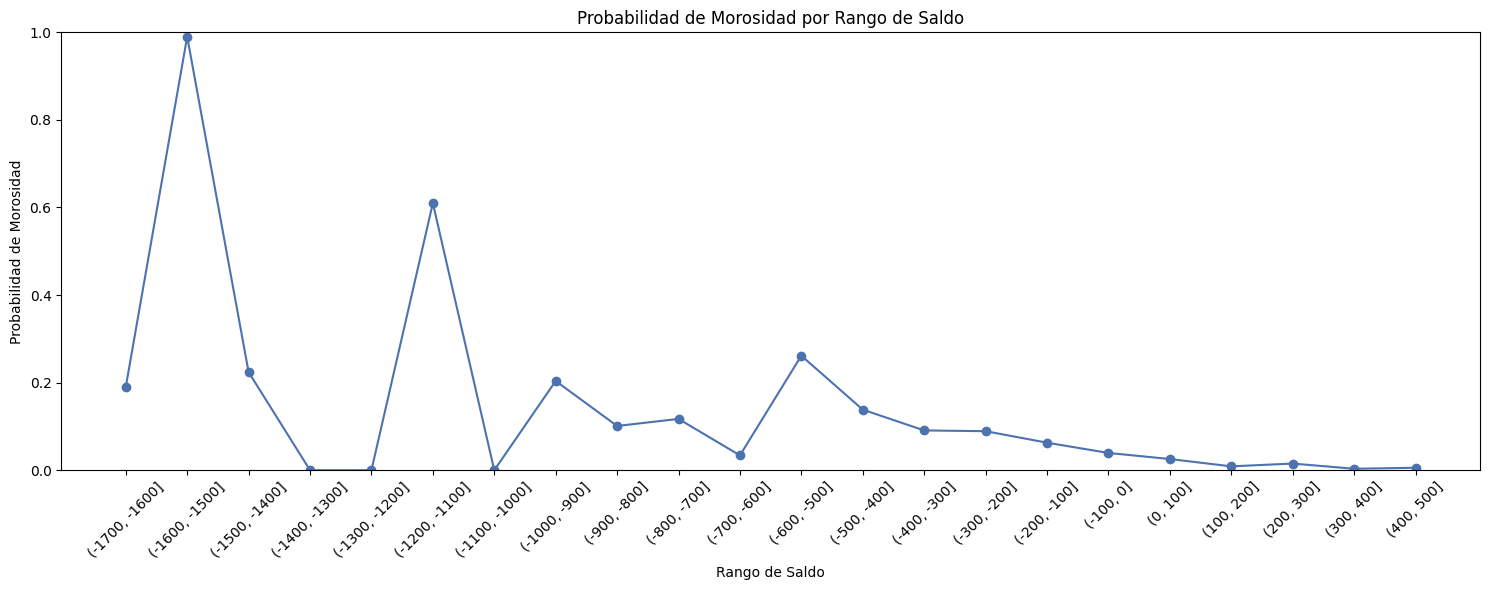

In [336]:
# Definir el rango de agrupación (cada 100)
bins = range(-1700, 600, 100)
results['rango'] = pd.cut(results['saldo'], bins)

# Agrupar por rango y calcular la probabilidad media
resultado_prob = results.groupby('rango')['probabilidad_incumplimiento'].mean().reset_index()
resultado_prob['probabilidad_incumplimiento'] = resultado_prob['probabilidad_incumplimiento'].fillna(0)


# Visualizar los resultados con un gráfico de líneas
plt.figure(figsize=(15, 6))
plt.plot(resultado_prob['rango'].astype(str), resultado_prob['probabilidad_incumplimiento'], marker='o', linestyle='-')

plt.title('Probabilidad de Morosidad por Rango de Saldo')
plt.xlabel('Rango de Saldo')
plt.ylabel('Probabilidad de Morosidad')
plt.xticks(rotation=45)  # Rotar etiquetas para mejor legibilidad
plt.ylim(0, 1)  

plt.tight_layout()
plt.show()

Hay rangos donde la probabilidad de incumplimiento es 0, debido a que no hay clientes con saldos en esos rangos. Este vacío en la muestra es una **limitación** del análisis, ya que no se puede inferir la probabilidad en esos rangos sin datos reales.

Los valores 0 en ciertos rangos y otros rangos con valores significativos indican una distribución desigual de los clientes, lo que puede sesgar los resultados del análisis. Estos vacíos limitan la capacidad de generalizar el comportamiento de incumplimiento a toda la población de clientes.

**Limitaciones del Modelo y Análisis:**
* Falta de datos en ciertos rangos: la ausencia de clientes en ciertos rangos reduce la robustez de las conclusiones sobre esos segmentos y hace que la extrapolación de las probabilidades sea riesgosa. Las estimaciones para los segmentos sin datos pueden ser incorrectas o sesgadas si se aplican métodos de interpolación sin justificación sólida.
* Sobreajuste: Si el modelo se ajusta a las categorías donde sí tenemos clientes, el rendimiento en categorías sin clientes será incierto.
* Distribución de los datos: El análisis puede estar influenciado por la concentración de clientes en ciertos rangos, lo que puede hacer que los resultados sean poco representativos para la población general.

### Análisis adicional del rendimiento del modelo -- revisar

El **Gráfico de Ganancia Cumulativa o Lift Chart** es una herramienta útil para evaluar el rendimiento de un modelo de clasificación, particularmente en términos de cómo predice la probabilidad de un evento (en este caso, el incumplimiento) frente a un modelo aleatorio.  

¿Qué es el Gráfico de Ganancia Cumulativa?
El Lift Chart o Gráfico de Ganancia Cumulativa muestra la proporción de verdaderos positivos acumulados en función del porcentaje de observaciones clasificadas, comparado con un modelo aleatorio. En otras palabras, te ayuda a visualizar cuánto mejor está el modelo en identificar los eventos de incumplimiento en comparación con lo que se esperaría de una selección aleatoria.

*Interpretación del Gráfico*
* Curva del Modelo: Si la curva del modelo es más pronunciada al principio, significa que tu modelo está identificando más casos de incumplimiento en las primeras observaciones (aquellas con mayor probabilidad predicha). Por ejemplo, si en el primer 20% de las observaciones predices correctamente el 50% de los incumplimientos reales, esto indica que tu modelo está funcionando mucho mejor que un modelo aleatorio.

* Línea Aleatoria: Esta es la línea base que representa un modelo aleatorio. En cualquier punto del gráfico, la ganancia acumulada de un modelo aleatorio sería proporcional al porcentaje de datos evaluados.

* Lift: El lift es la relación entre la ganancia de tu modelo y la ganancia esperada de un modelo aleatorio. Si tu modelo muestra un incremento rápido al inicio, significa que está identificando con éxito más incumplimientos de lo esperado, por lo tanto, tiene un lift elevado.

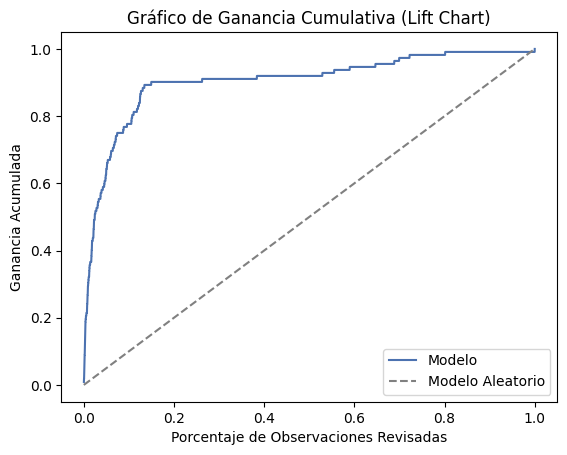

In [337]:
# Combinar los dataframes
df = results.join(df_finanzas[['default']], how='left')

# Renombrar la columna 'default' 
df.rename(columns={'default': 'incumplimiento_real'}, inplace=True)


# Ordenar por probabilidad de incumplimiento predicha
df = df.sort_values(by='probabilidad_incumplimiento', ascending=False)

# Calcular los verdaderos positivos acumulados
df['verdaderos_positivos_acum'] = df['incumplimiento_real'].cumsum()

# Calcular el porcentaje de observaciones revisadas
df['porcentaje_observaciones'] = np.arange(1, len(df)+1) / len(df)

# Calcular el porcentaje acumulado de incumplimientos (ganancia)
df['ganancia_acumulada'] = df['verdaderos_positivos_acum'] / df['incumplimiento_real'].sum()

# Crear el gráfico
plt.plot(df['porcentaje_observaciones'], df['ganancia_acumulada'], label='Modelo')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Modelo Aleatorio')
plt.xlabel('Porcentaje de Observaciones Revisadas')
plt.ylabel('Ganancia Acumulada')
plt.title('Gráfico de Ganancia Cumulativa (Lift Chart)')
plt.legend()
plt.show()


Interpretación del Lift Chart:
* Eje X: Representa el porcentaje de observaciones revisadas (ordenadas según la probabilidad de incumplimiento, de mayor a menor). Este eje refleja cuántas observaciones (en porcentaje) han sido consideradas.

* Eje Y: Indica la ganancia acumulada, es decir, el porcentaje acumulado de positivos (incumplimientos) identificados. A medida que recorres el eje X, ves cuántos incumplimientos ha capturado tu modelo.

* Línea punteada (modelo aleatorio): Representa un modelo que selecciona observaciones de manera aleatoria. Si revisas un 10% de las observaciones, el modelo aleatorio debería capturar el 10% de los incumplimientos, y así sucesivamente, dando lugar a una línea recta con pendiente de 45 grados.

* Curva azul (modelo entrenado): Muestra el rendimiento de tu modelo. Una curva que se separa rápidamente hacia arriba (como lo hace la tuya) indica que el modelo está haciendo un buen trabajo en capturar rápidamente los incumplimientos, ordenando las observaciones de manera efectiva.

Conclusiones:
* *Desempeño del modelo:* Tu modelo está funcionando bastante bien, ya que al principio (primeros porcentajes en el eje X) la curva azul sube rápidamente, lo que significa que revisando un pequeño porcentaje de las observaciones, logras identificar un alto porcentaje de los incumplimientos.

* *Ganancia temprana:* Al revisar alrededor del 20% de las observaciones, tu modelo está capturando más del 80% de los incumplimientos, lo que sugiere que está priorizando correctamente las observaciones con mayor probabilidad de incumplimiento.

* *Eficiencia:* Comparado con el modelo aleatorio, tu modelo tiene una ganancia acumulada mucho más alta en las primeras revisiones. Esto indica que el modelo es significativamente más eficiente al ordenar las observaciones y seleccionar aquellas que tienen mayor probabilidad de incumplimiento.

* *Punto de saturación:* La curva azul se empieza a aplanar a medida que te acercas al 100% de las observaciones. Esto indica que después de cierto punto, la capacidad del modelo de encontrar más incumplimientos disminuye, lo cual es natural, dado que los primeros datos revisados son los de mayor riesgo.

### Identificación del punto en que se produce cambio brusco en la probabilidad -- revisar 

**Detección de Cambio (Change Point Detection):**

* Usa un algoritmo de detección de puntos de cambio para identificar un cambio brusco en la tendencia de la probabilidad de incumplimiento en función del saldo. Esto puede ayudarte a detectar el saldo exacto en el que la probabilidad de incumplimiento aumenta significativamente.
* Librerías como ruptures en Python permiten realizar este tipo de análisis.

In [327]:
%pip install ruptures

import ruptures as rpt

# Selecciona la columna de probabilidades predichas y balances
signal = results[['probabilidad_incumplimiento', 'saldo']].values

# Detecta los puntos de cambio
algo = rpt.Binseg(model="l2").fit(signal)
result = algo.predict(n_bkps=1)  # Solo queremos un punto de cambio principal

print(f'Punto de cambio estimado en el saldo: {results.iloc[result[0]]["saldo"]}')


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Punto de cambio estimado en el saldo: 73


*No entiendo muy bien por que detecta este punto como el punto de cambio.*

### Análisis estadistico -- revisar

**Prueba de proporciones (z-test para proporciones):**

Si te interesa saber si las diferencias en el porcentaje de incumplimiento entre diferentes rangos de saldo son significativas, podrías aplicar una prueba de proporciones.
Por ejemplo, si comparas el porcentaje de incumplimiento de dos rangos de saldo distintos, podrías usar una prueba de hipótesis sobre proporciones para ver si las diferencias son estadísticamente significativas.

In [328]:
from scipy.stats import kruskal

# Filtrar los valores NaN de la columna 'rango' y 'probabilidad_incumplimiento'
results_clean = results.dropna(subset=['rango', 'probabilidad_incumplimiento'])

# Crear una lista para almacenar los datos de cada grupo/rango
grupos = [results_clean[results_clean['rango'] == rango]['probabilidad_incumplimiento'] 
          for rango in results_clean['rango'].unique()]

# Realizar la prueba Kruskal-Wallis
stat, p_value = kruskal(*grupos)

print(f'Estadístico H: {stat}')
print(f'P-valor: {p_value}')


Estadístico H: 1487.303456346061
P-valor: 2.350565297963844e-304


El p-valor es menor que 0.05 (nivel de significancia típico), podemos rechazar la hipótesis nula de que las distribuciones de probabilidad de incumplimiento en los diferentes rangos son iguales, lo que sugiere que los rangos de saldo influyen significativamente en la probabilidad de incumplimiento.

In [329]:
%pip install scikit-posthocs

from scipy.stats import kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scikit_posthocs import posthoc_dunn

# Filtrar los valores NaN de la columna 'rango' y 'probabilidad_incumplimiento'
results_clean = results.dropna(subset=['rango', 'probabilidad_incumplimiento'])

# Crear una lista para almacenar los datos de cada grupo/rango
grupos = [results_clean[results_clean['rango'] == rango]['probabilidad_incumplimiento'] 
          for rango in results_clean['rango'].unique()]

# Realizar la prueba Kruskal-Wallis
stat, p_value = kruskal(*grupos)

print(f'\nEstadístico H: {stat}')
print(f'\nP-valor: {p_value}')

# Realizar la prueba post-hoc de Dunn
dunn_results = posthoc_dunn(results_clean, val_col='probabilidad_incumplimiento', group_col='rango', p_adjust='bonferroni')

print(dunn_results)




Estadístico H: 1487.303456346061

P-valor: 2.350565297963844e-304
                (-1700, -1600]  (-1600, -1500]  (-1500, -1400]  \
(-1700, -1600]             1.0             1.0        1.000000   
(-1600, -1500]             1.0             1.0        1.000000   
(-1500, -1400]             1.0             1.0        1.000000   
(-1300, -1200]             1.0             1.0        1.000000   
(-1200, -1100]             1.0             1.0        1.000000   
(-1000, -900]              1.0             1.0        1.000000   
(-900, -800]               1.0             1.0        1.000000   
(-800, -700]               1.0             1.0        1.000000   
(-700, -600]               1.0             1.0        0.243059   
(-600, -500]               1.0             1.0        1.000000   
(-500, -400]               1.0             1.0        1.000000   
(-400, -300]               1.0             1.0        1.000000   
(-300, -200]               1.0             1.0        0.924692   
(-200, -


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\Natalya\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikit_posthocs\_posthocs.py:368: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x_lens = x.groupby(_group_col)[_val_col].count()
c:\Users\Natalya\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikit_posthocs\_posthocs.py:371: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x_ranks_avg = x.groupby(_group_col)["ranks"].mean()


Estadístico H:

* Valor: 2228.78. 
Este valor indica la estadística de prueba calculada. Un valor más alto generalmente sugiere que hay diferencias significativas entre los grupos.

P-valor:

* Valor: 0.0.
Un p-valor de 0 indica que hay evidencia muy fuerte para rechazar la hipótesis nula, que generalmente establece que no hay diferencia entre los grupos. Esto sugiere que al menos un par de grupos tiene diferencias significativas en las medianas.

Matriz de Comparaciones: 

La matriz que has obtenido muestra los p-valores ajustados para cada comparación entre los diferentes intervalos (o grupos) de datos.

Interpretación de los valores:
* Un p-valor cercano a 1 indica que no hay diferencia significativa entre los grupos comparados.
* Un p-valor cercano a 0 indica diferencias significativas. Por ejemplo, en la matriz, puedes ver que algunos p-valores son extremadamente bajos (por ejemplo, 3.486191e-216 y 7.032442e-295), lo que indica diferencias significativas entre los grupos.

                (-1700, -1600]  (-1600, -1500]  (-1500, -1400]  \
(-1700, -1600]             NaN             NaN             NaN   
(-1600, -1500]             NaN             NaN             NaN   
(-1500, -1400]             NaN             NaN             NaN   
(-1300, -1200]             NaN             NaN             NaN   
(-1200, -1100]             NaN             NaN             NaN   
(-1000, -900]              NaN             NaN             NaN   
(-900, -800]               NaN             NaN             NaN   
(-800, -700]               NaN             NaN             NaN   
(-700, -600]               NaN             NaN             NaN   
(-600, -500]               NaN             NaN             NaN   
(-500, -400]               NaN             NaN             NaN   
(-400, -300]               NaN             NaN             NaN   
(-300, -200]               NaN             NaN             NaN   
(-200, -100]               NaN             NaN             NaN   
(-100, 0] 

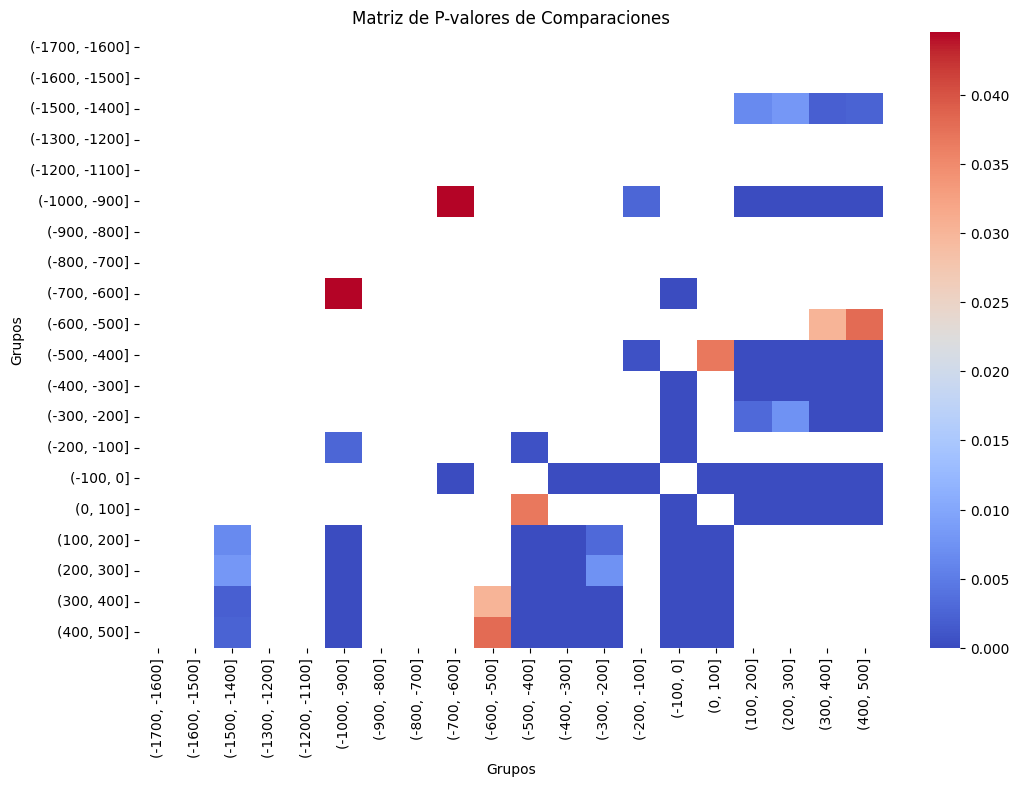

In [330]:
resultados_df = pd.DataFrame(dunn_results) 

# Filtrar los p-valores significativos (por debajo de 0.05)
umbral = 0.05
resultados_significativos = resultados_df[resultados_df < umbral]

# Mostrar solo las comparaciones significativas
print(resultados_significativos)


# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear un heatmap con la matriz de p-valores
sns.heatmap(resultados_significativos, annot=False, cmap='coolwarm')

# Títulos y etiquetas
plt.title('Matriz de P-valores de Comparaciones')
plt.xlabel('Grupos')
plt.ylabel('Grupos')

# Mostrar el gráfico
plt.show()
